In [2]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 1. Data Description

For the players.csv dataset, there are 196 observations. The number of variables are 7, including `experience`, `subscribe`, `hashedEmail`, `played_hours`, `name`, `gender` and `Age`. 

-	`experience` : the level of experience of the player (e.g., Pro, Veteran, Regular, Amateur). (Type: character)
-	`subscribe` : whether the player is a subscriber (True/False). (Type: logical)
-	`hashedEmail` : hashed version of the player's email. (Type: character)
-	`played_hours` : number of hours the player has spent playing. (Type: double - numeric values with decimal points) 
-	`name`: player's name (Type: character)
-	`gender` : player's gender (Male, Female, etc.) (Type: character)
-	`Age` : player's age (Type: double)

Issues in players.csv dataset:
- `Age` contains 2 missing values (NA).
- `hashedEmail` is an identifier and does not contribute to analysis.
- `played_hours` contain extreme values or outliers. (e.g., 0)

For the sessions.csv dataset, there are 1535 observations. The number of variables are 5, including `hashedEmail`, `start_time`, `end_time`, `original_start_time`, `original_end_time`.

- `hashedEmail` : hashed version of the player's email. (Type: character)
- `start_time` : The start time of the session in DD/MM/YYYY HH:MM format. (Type: character)
- `end_time` : The end time of the session in DD/MM/YYYY HH:MM format. (Type: character)
- `original_start_time` : The original start time of the session in Unix epoch time (milliseconds). (Type: double)
- `original_end_time` : The original end time of the session in Unix epoch time (milliseconds). (Type: double)

Issues in sessions.csv dataset:
- `hashedEmail` is can be used for relating the two datasets.
- This dataset is not needed for my question.


## 2. Questions

Broad Question: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

Specific Question: Can experience, subscribe, age, and gender predict played hours in the players.csv dataset?

Data Utility:

- `played_hours` is the response variable (continuous variable representing data contribution).
- `experience`, `subscribe`, `age`, and `gender` are explanatory variables.
- Using players.csv dataset only.
- Data wrangling may involve.


## 3. Exploratory Data Analysis and Visualization

In [20]:
players <- read_csv("players.csv")
players
sessions <- read_csv("sessions.csv")
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [21]:
players_mean <- players |>
  summarise(mean_played_hours = mean(played_hours, na.rm = TRUE),
            mean_age = mean(Age, na.rm = TRUE))
players_mean

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


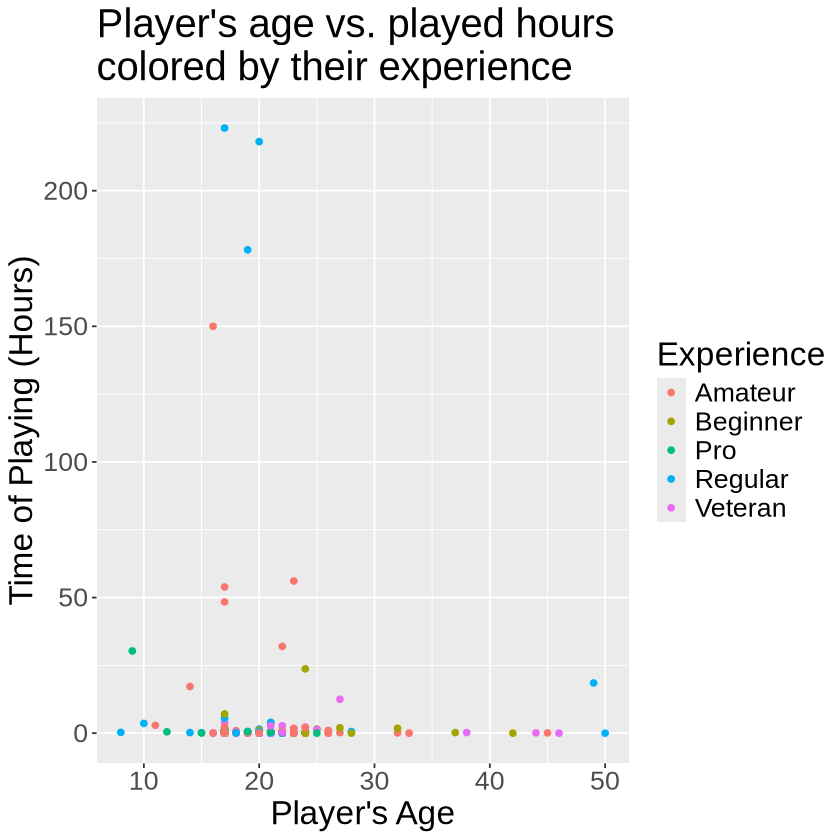

In [30]:
plot_1 <- players |>
  ggplot(aes(x = Age, y = played_hours, color = experience)) +
  geom_point() +
  labs(title = "Player's age vs. played hours \ncolored by their experience", x = "Player's Age", y = "Time of Playing (Hours)", color = "Experience") +
  theme(text = element_text(size = 20))

plot_1

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


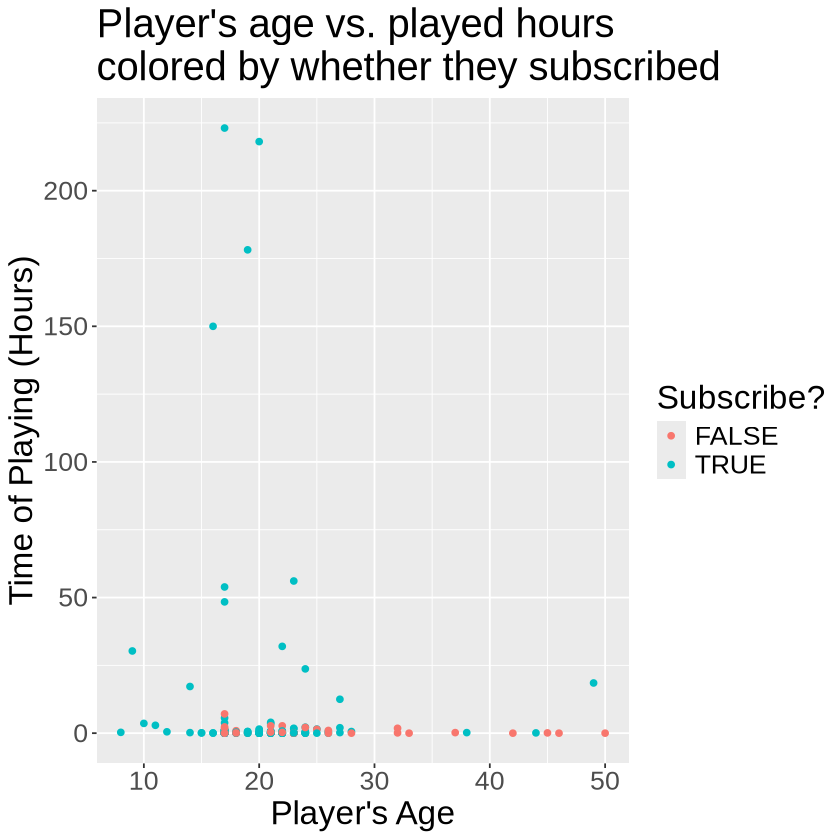

In [28]:
plot_2 <- players |>
  ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point() +
  labs(title = "Player's age vs. played hours \ncolored by whether they subscribed", x = "Player's Age", y = "Time of Playing (Hours)", color = "Subscribe?") +
  theme(text = element_text(size = 20))

plot_2

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


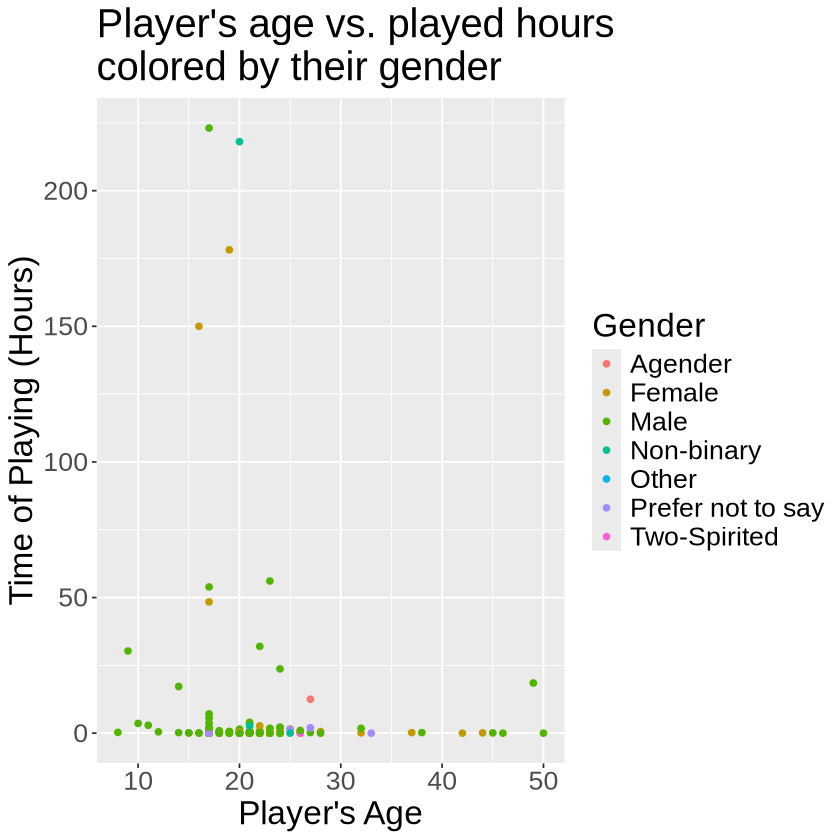

In [29]:
plot_3 <- players |>
ggplot(aes(x = Age, y = played_hours, color = gender)) +
geom_point() +
labs(title = "Player's age vs. played hours\ncolored by their gender", x = "Player's Age", y = "Time of Playing (Hours)", color = "Gender") +
theme(text = element_text(size = 20))

plot_3

## 4. Methods and Plan

Regression Approach: Multiple Linear Regression (MLR)

Justification:
- Suitable for predicting a continuous response variable (played_hours).
- Allows us to assess the impact of multiple predictors simultaneously.
- Perform well with a large number of predictors

Assumptions & Limitations:
- Assumes a linear relationship between predictors and response variable.
- Sensitive to outliers, which may distort predictions.
- Does not capture non-linear effects.

Model Selection & Data Processing:
- Split data into training (70%) and testing (30%) sets.
- Consider cross-validation to optimize model performance.
- Compare models using RMSE and RMSPE.

This plan ensures a structured approach to identifying key players who contribute the most data and refining recruitment strategies accordingly.